# Data Science: Bank Marketing (Campaign) - Group Project

**Problem Statement:** ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

**Why ML Model:** Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more. This will save resource and their time ( which is directly involved in the cost ( resource billing)).

**Data Set Information :** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Objective:** Obtain a model that determines whether or not X customer will buy your product, based on past interactions with the bank and other financial institutions.

**Steps**
1. EDA
2. Outlier detection and elimination
3. Missing values imputation
4. Encoding categorical features
5. Data Scaling and Normalization
6. Data transformation

## Quick EDA

In [1]:
# Importings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset loading
bank_df = pd.read_csv("Datasets/bank-additional/bank-additional-full.csv", sep=";")
print(bank_df.head())
print(bank_df.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset has 21 columns (features) and 41188 rows (instances)

### Outlier detection

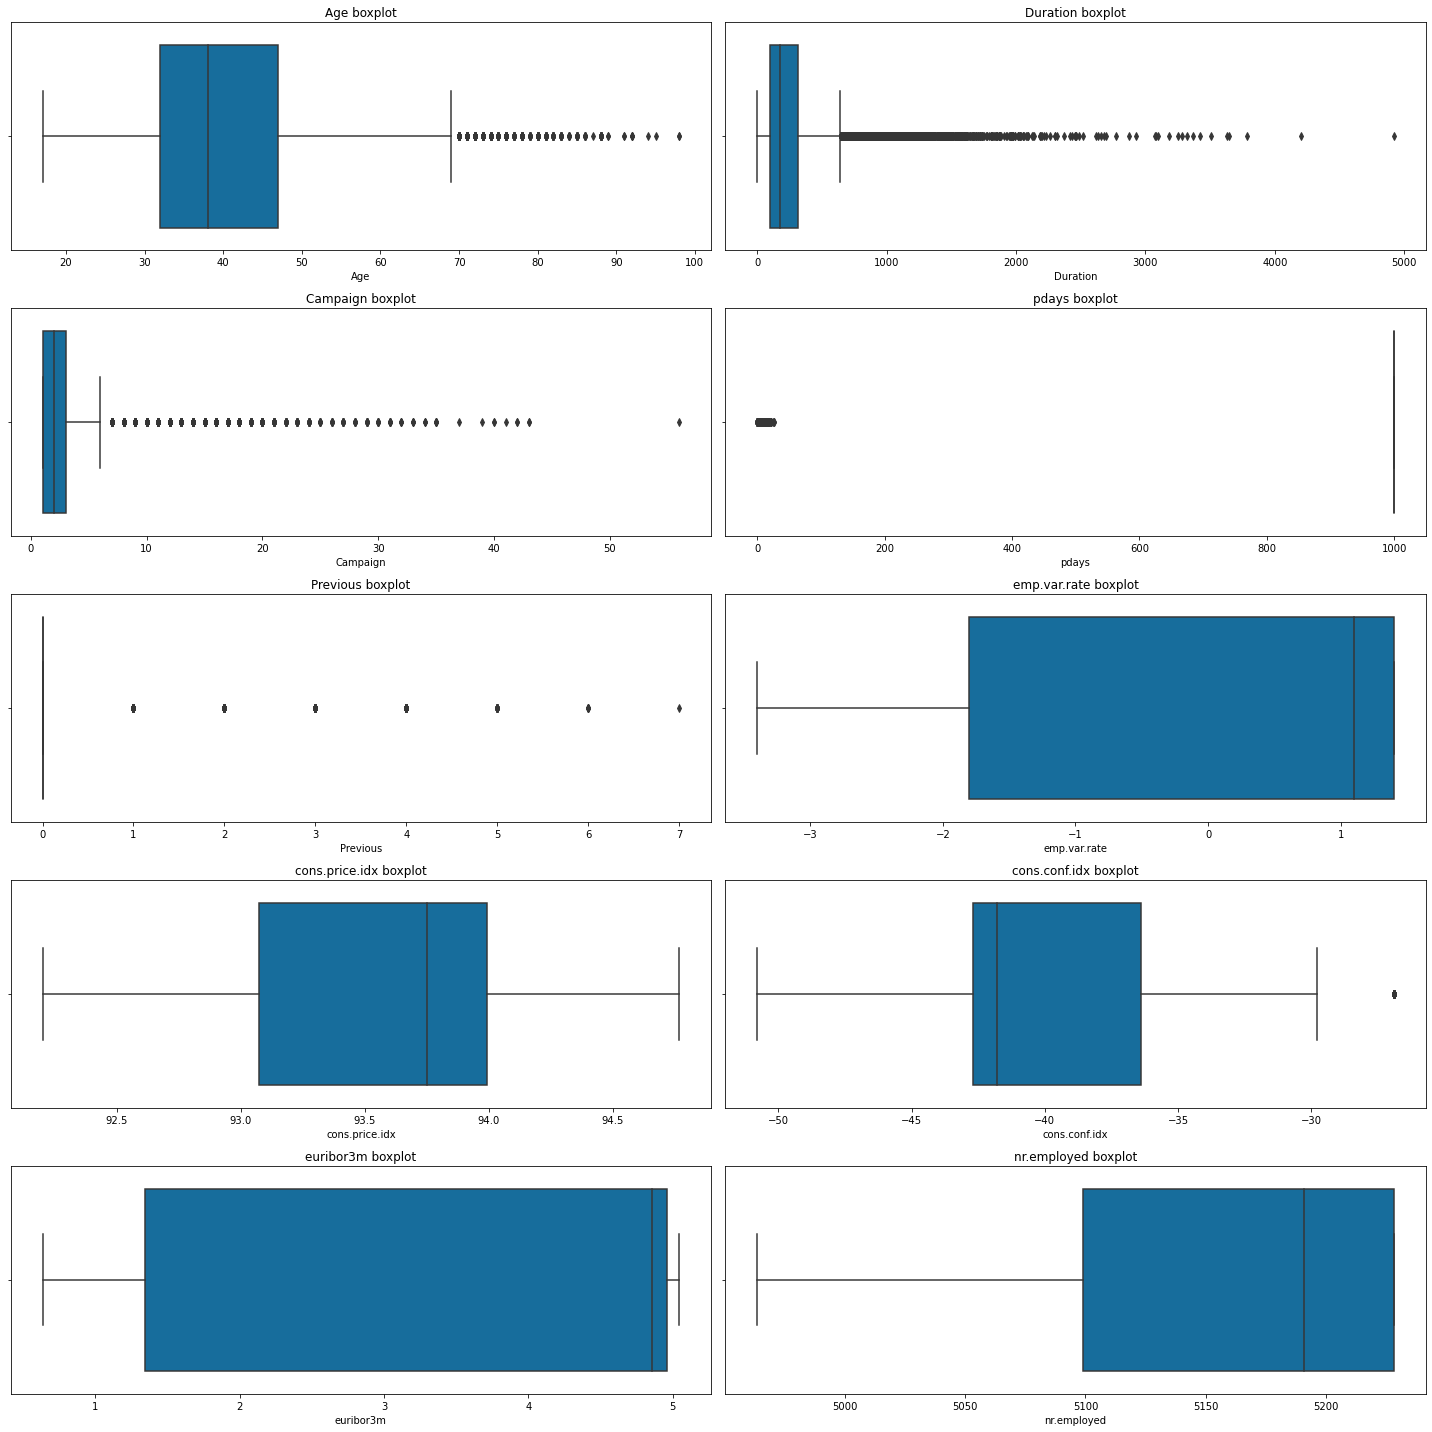

In [5]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

In [6]:
# Outlier filter

def remove_outliers(dfx):
    q1 = dfx.quantile(0.25)
    q3 = dfx.quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr*1.5
    
    df_filtred = dfx[~((dfx < (dfx.quantile(0.25) - cut_off)) | (dfx > (dfx.quantile(0.75) + cut_off))).any(axis=1)]
    
    
    return df_filtred

In [7]:
bank_df2 = remove_outliers(bank_df)

In [8]:
bank_df2.reset_index(drop=True, inplace=True)

In [9]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  int64  
 1   job             30360 non-null  object 
 2   marital         30360 non-null  object 
 3   education       30360 non-null  object 
 4   default         30360 non-null  object 
 5   housing         30360 non-null  object 
 6   loan            30360 non-null  object 
 7   contact         30360 non-null  object 
 8   month           30360 non-null  object 
 9   day_of_week     30360 non-null  object 
 10  duration        30360 non-null  int64  
 11  campaign        30360 non-null  int64  
 12  pdays           30360 non-null  int64  
 13  previous        30360 non-null  int64  
 14  poutcome        30360 non-null  object 
 15  emp.var.rate    30360 non-null  float64
 16  cons.price.idx  30360 non-null  float64
 17  cons.conf.idx   30360 non-null 

In [10]:
bank_df2.shape

(30360, 21)

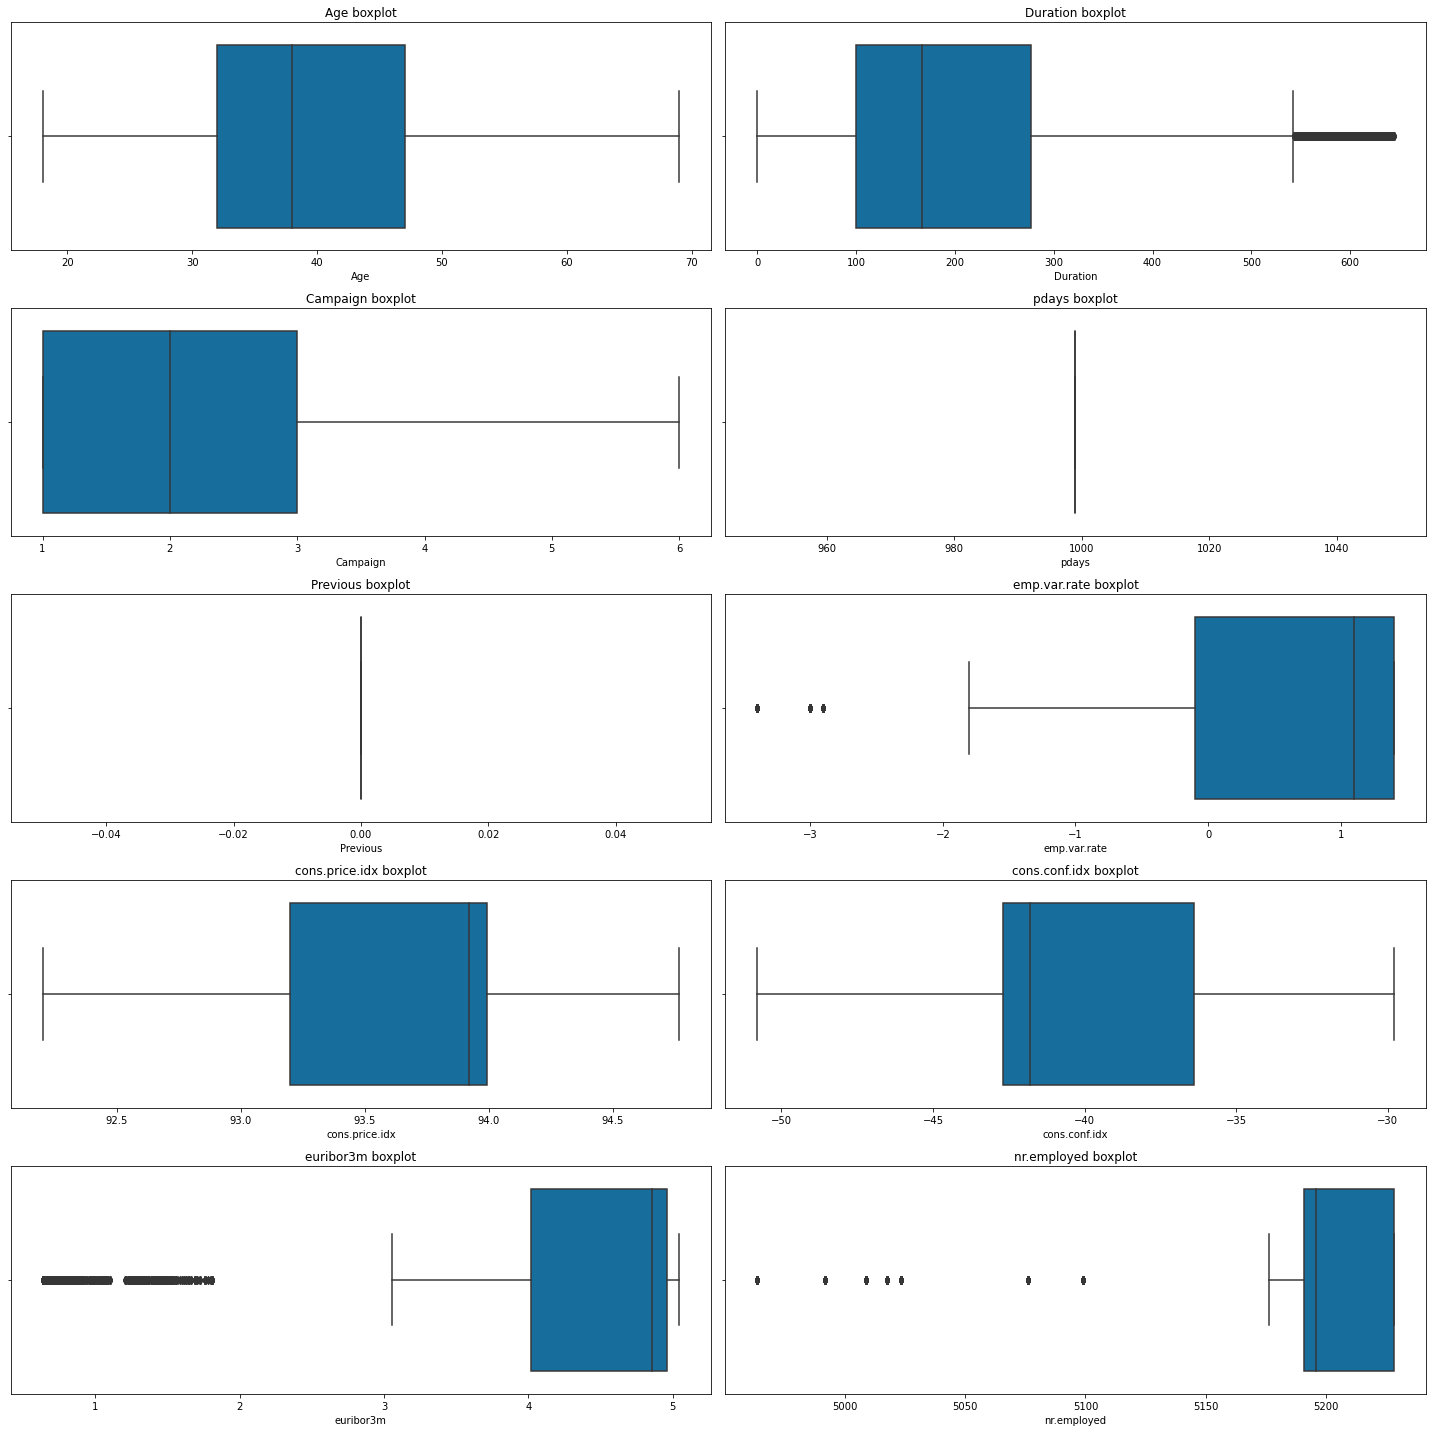

In [11]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df2, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df2, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df2, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df2, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df2, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df2, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df2, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df2, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df2, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df2, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

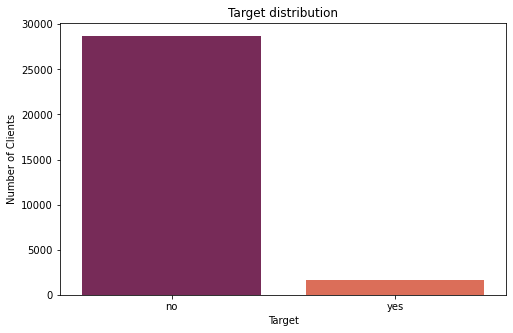

The amount of "no" target is =  36,548
The amount of "yes" target is = 4,640
The percentage of "no" target is = 88.73 %
The percentage of "yes" target is = 11.27 %


In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x= 'y', data= bank_df2, palette='rocket')
plt.xlabel("Target") 
plt.ylabel('Number of Clients')
plt.title("Target distribution")  
plt.show()
#Finding the percentages of our target
per_target= (bank_df['y'] == 'yes').value_counts().to_frame('q')
n_target_q = per_target.q.iloc[0]
y_target_q = per_target.q.iloc[1]
total=per_target.q.sum() 
print('The amount of "no" target is =  {:,}'.format(n_target_q))
print('The amount of "yes" target is = {:,}'.format(y_target_q))
print(f'The percentage of "no" target is = {round((n_target_q/total)*100,2)}','%')
print(f'The percentage of "yes" target is = {round((y_target_q/total)*100,2)}','%')

## **Categorical Features Analysis**

In [13]:
#Categorical features

categorical = bank_df2.select_dtypes(include="object")
categorical.drop("y", axis=1, inplace=True)
categorical_list = categorical.columns.to_list()

In [14]:
for cat in categorical_list:
    print(f"Column: {cat} unique values")
    print(bank_df2[cat].unique())

Column: job unique values
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Column: marital unique values
['married' 'single' 'divorced' 'unknown']
Column: education unique values
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Column: default unique values
['no' 'unknown' 'yes']
Column: housing unique values
['no' 'yes' 'unknown']
Column: loan unique values
['no' 'yes' 'unknown']
Column: contact unique values
['telephone' 'cellular']
Column: month unique values
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Column: day_of_week unique values
['mon' 'tue' 'wed' 'thu' 'fri']
Column: poutcome unique values
['nonexistent']


**Job**

In [15]:
bank_df2.job.value_counts()

admin.           7669
blue-collar      7146
technician       5086
services         2966
management       2141
entrepreneur     1096
self-employed    1060
retired           911
housemaid         804
unemployed        727
student           507
unknown           247
Name: job, dtype: int64

##############################################
Unkown job clients =  247
##############################################
Percentage of unknown client's job = 0.81 %


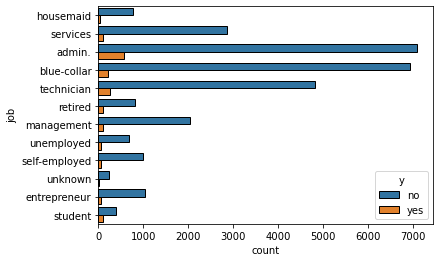

In [16]:
sns.countplot(data=bank_df2, y='job',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['job'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's job =" ,round(bank_df2[(bank_df2['job'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Marital**

In [17]:
bank_df2.marital.value_counts()

married     18647
single       8305
divorced     3362
unknown        46
Name: marital, dtype: int64

##############################################
Unkown job clients =  46
##############################################
Percentage of unknown client's marital = 0.15 %


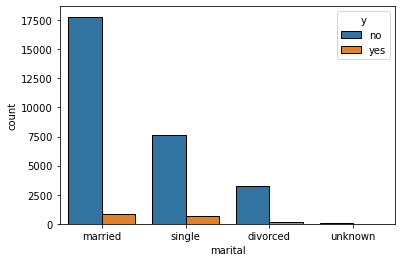

In [18]:
sns.countplot(data=bank_df2, x='marital',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['marital'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's marital =" ,round(bank_df2[(bank_df2['marital'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Education**

In [19]:
bank_df2.education.value_counts()

university.degree      8879
high.school            6940
basic.9y               4604
professional.course    3911
basic.4y               3047
basic.6y               1734
unknown                1232
illiterate               13
Name: education, dtype: int64

##############################################
Unkown job clients =  1232
##############################################
Percentage of unknown client's education level = 4.13 %


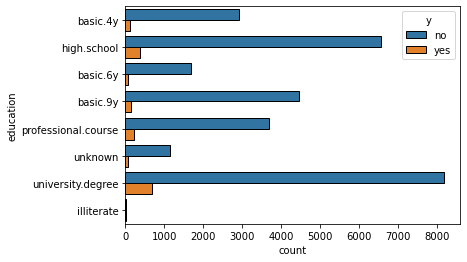

In [20]:
sns.countplot(data=bank_df2, y='education',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['education'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's education level =" ,round(bank_df2[(bank_df['education'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Default**

In [21]:
bank_df2.default.value_counts()

no         23494
unknown     6864
yes            2
Name: default, dtype: int64

##############################################
Unkown job clients =  6864
##############################################
Percentage of unknown client's default = 22.61 %


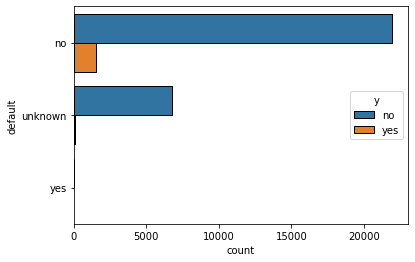

In [22]:
sns.countplot(data=bank_df2, y='default',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['default'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df2['default'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Housing**

In [23]:
bank_df2.housing.value_counts()

yes        15799
no         13826
unknown      735
Name: housing, dtype: int64

##############################################
Unkown job clients =  735
##############################################
Percentage of unknown client's default = 2.41 %


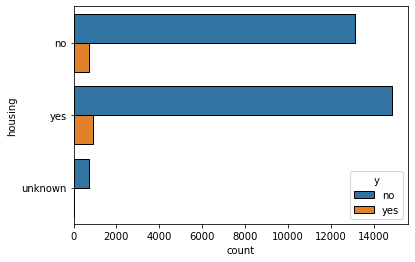

In [24]:
sns.countplot(data=bank_df2, y='housing',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['housing'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df['housing'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Loan**

In [25]:
bank_df2.loan.value_counts()

no         25026
yes         4599
unknown      735
Name: loan, dtype: int64

##############################################
Unkown job clients =  735
##############################################
Percentage of unknown client's default = 2.42 %


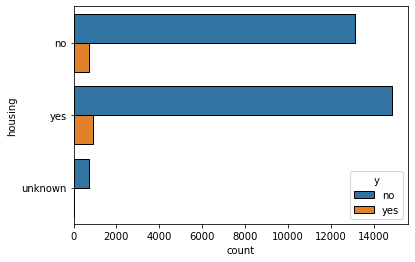

In [26]:
sns.countplot(data=bank_df2, y='housing',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['housing'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df2['housing'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

### **Categorical Features Imputation**

In [27]:
bank_df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [28]:
bank_df2.replace('unknown', np.nan, regex=True,inplace=True)
bank_df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0, 0.5, 'NAs')

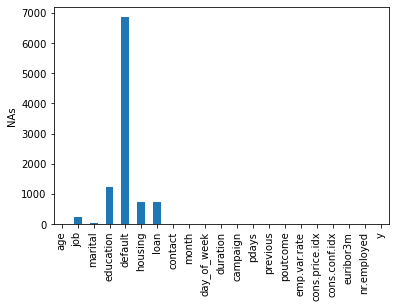

In [29]:
bank_df2.isna().sum().plot.bar()
plt.ylabel("NAs")

In [30]:
eliminacion = bank_df2.copy()
eliminacion = eliminacion.dropna()
print('Se eliminaron ',bank_df2.shape[0]-eliminacion.shape[0],' instancias por los Nan')
print('Equivale a un  ',round(((bank_df2.shape[0]-eliminacion.shape[0])/bank_df2.shape[0])*100,2),' % del dataset original')
print( 'Tamaño del dataset actual = ',eliminacion.shape[0])

Se eliminaron  8300  instancias por los Nan
Equivale a un   27.34  % del dataset original
Tamaño del dataset actual =  22060


In [31]:
bank_df3 = eliminacion.copy()
bank_df3 = bank_df3.drop("default", axis=1)

In [32]:
bank_df3.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Numerical features analysis**

In [33]:
#Numerical features

numerical = bank_df3.select_dtypes(include=[np.number])
numerical_cols = numerical.columns.to_list()
numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,22060.000000,22060.000000,22060.000000,22060.0,22060.0,22060.000000,22060.000000,22060.000000,22060.000000,22060.000000
mean,38.521940,205.165367,2.066636,999.0,0.0,0.251976,93.595045,-40.572743,3.828644,5176.922974
std,9.249297,140.269352,1.293994,0.0,0.0,1.479560,0.548236,4.286526,1.624231,64.162172
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,100.000000,1.000000,999.0,0.0,-1.800000,93.200000,-42.700000,1.415000,5099.100000
50%,37.000000,168.000000,2.000000,999.0,0.0,1.100000,93.798000,-41.800000,4.857000,5195.800000
75%,45.000000,277.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,69.000000,644.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


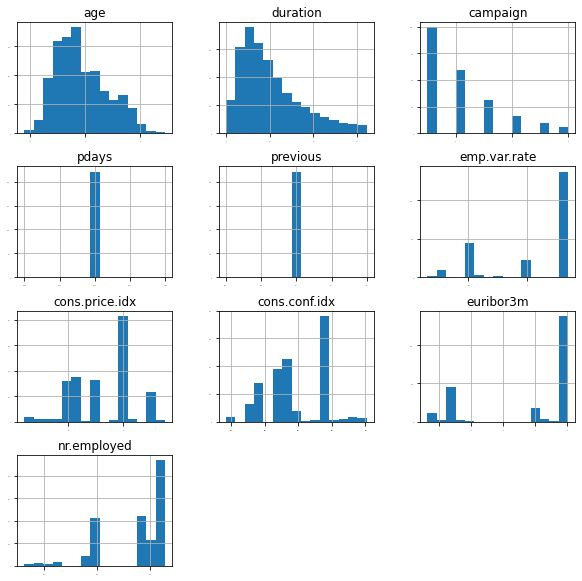

In [34]:
numerical.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

In [35]:
bank_df4 = bank_df3.drop(["pdays", "previous"], axis=1)

In [36]:
bank_df4.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
bank_df4.shape

(22060, 18)

Final dataframe

In [38]:
final_df = bank_df4.copy()

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22060 entries, 0 to 30359
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22060 non-null  int64  
 1   job             22060 non-null  object 
 2   marital         22060 non-null  object 
 3   education       22060 non-null  object 
 4   housing         22060 non-null  object 
 5   loan            22060 non-null  object 
 6   contact         22060 non-null  object 
 7   month           22060 non-null  object 
 8   day_of_week     22060 non-null  object 
 9   duration        22060 non-null  int64  
 10  campaign        22060 non-null  int64  
 11  poutcome        22060 non-null  object 
 12  emp.var.rate    22060 non-null  float64
 13  cons.price.idx  22060 non-null  float64
 14  cons.conf.idx   22060 non-null  float64
 15  euribor3m       22060 non-null  float64
 16  nr.employed     22060 non-null  float64
 17  y               22060 non-null 

In [40]:
categorical_cols = final_df.select_dtypes(include="object").columns.to_list()
categorical_cols.remove("y")
categorical_cols

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [41]:
numerical_cols = final_df.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols

['age',
 'duration',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## **Modeling**

In [42]:
from pycaret.classification import *

In [44]:
clfs = setup(data = final_df, target = 'y',
             session_id=234, normalize=True, 
             numeric_features=numerical_cols, categorical_features=categorical_cols, 
             transformation = True, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             fix_imbalance=True,
             data_split_stratify=True)

,Description,Value
0,session_id,234
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(22060, 18)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


2021/05/06 11:20:58 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [45]:
models = compare_models(sort="AUC", n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9393,0.9449,0.4786,0.5396,0.5060,0.4739,0.4755,3.6090
catboost,CatBoost Classifier,0.9395,0.9440,0.4458,0.5442,0.4895,0.4578,0.4606,9.4360
xgboost,Extreme Gradient Boosting,0.9370,0.9404,0.4277,0.5202,0.4689,0.4357,0.4384,2.7560
rf,Random Forest Classifier,0.9381,0.9381,0.4368,0.5293,0.4776,0.4451,0.4479,0.6220
gbc,Gradient Boosting Classifier,0.9181,0.9374,0.6566,0.4187,0.5107,0.4685,0.4830,2.9150
lda,Linear Discriminant Analysis,0.8567,0.9334,0.8686,0.2962,0.4414,0.3814,0.4548,0.1960
lr,Logistic Regression,0.8639,0.9332,0.8646,0.3072,0.4529,0.3948,0.4645,1.7120
et,Extra Trees Classifier,0.9364,0.9262,0.3950,0.5152,0.4463,0.4133,0.4178,0.6130
ada,Ada Boost Classifier,0.9160,0.9232,0.6069,0.4042,0.4846,0.4410,0.4521,0.7920
knn,K Neighbors Classifier,0.8664,0.8672,0.7283,0.2910,0.4155,0.3555,0.4037,0.8720


In [46]:
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9392,0.9567,0.5050,0.5368,0.5204,0.4880,0.4882
1,0.9475,0.9496,0.4700,0.6267,0.5371,0.5099,0.5159
2,0.9398,0.9505,0.5700,0.5327,0.5507,0.5185,0.5188
3,0.9372,0.9344,0.4600,0.5169,0.4868,0.4534,0.4543
4,0.9404,0.9402,0.4300,0.5513,0.4831,0.4520,0.4560
5,0.9359,0.9392,0.4400,0.5057,0.4706,0.4366,0.4378
6,0.9404,0.9541,0.5347,0.5455,0.5400,0.5081,0.5082
7,0.9411,0.9459,0.4851,0.5568,0.5185,0.4873,0.4886
8,0.9313,0.9360,0.4158,0.4719,0.4421,0.4057,0.4066
9,0.9404,0.9422,0.4752,0.5517,0.5106,0.4791,0.4806


In [47]:
#trained model object is stored in the variable 'lgbm'. 
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [48]:
tuned_lgbm = tune_model(lgbm, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9172,0.9587,0.8218,0.4301,0.5646,0.5237,0.5574
1,0.9171,0.9416,0.7500,0.4213,0.5396,0.4979,0.5230
2,0.8970,0.9486,0.8200,0.3677,0.5077,0.4594,0.5057
3,0.9009,0.9276,0.7000,0.3627,0.4778,0.4291,0.4575
4,0.9113,0.9336,0.6400,0.3879,0.4830,0.4377,0.4541
5,0.9061,0.9431,0.8100,0.3913,0.5277,0.4825,0.5221
6,0.9113,0.9518,0.8119,0.4100,0.5449,0.5015,0.5376
7,0.9100,0.9417,0.7327,0.3978,0.5157,0.4708,0.4976
8,0.9003,0.9282,0.6733,0.3598,0.4690,0.4195,0.4446
9,0.9048,0.9412,0.7921,0.3883,0.5212,0.4751,0.5125


In [49]:
#tuned model object is stored in the variable 'tuned_lgbm'. 
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=180, n_jobs=-1, num_leaves=40, objective=None,
               random_state=234, reg_alpha=1, reg_lambda=0.0001, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


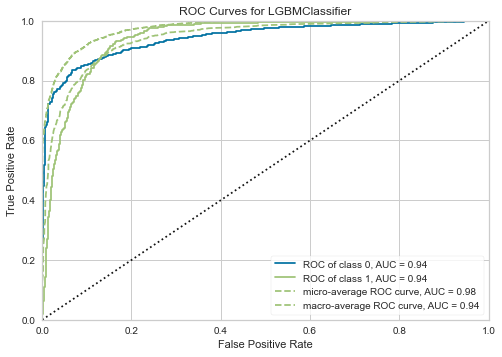

In [50]:
plot_model(tuned_lgbm, plot = 'auc')

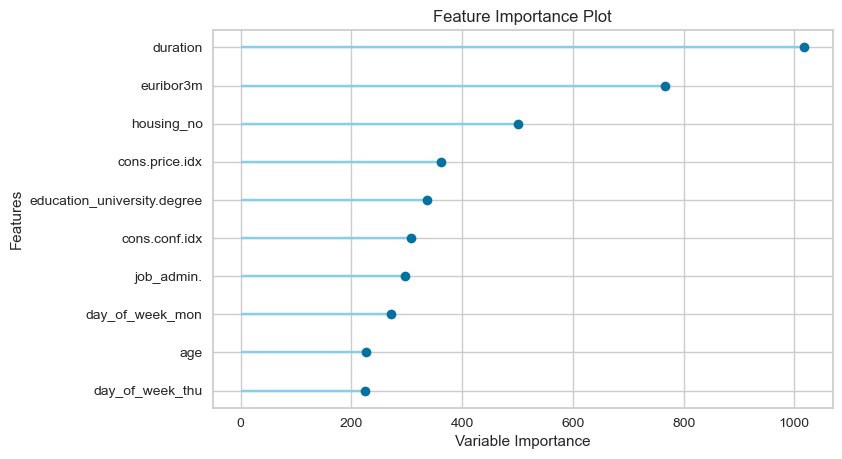

In [51]:
plot_model(tuned_lgbm, plot='feature')

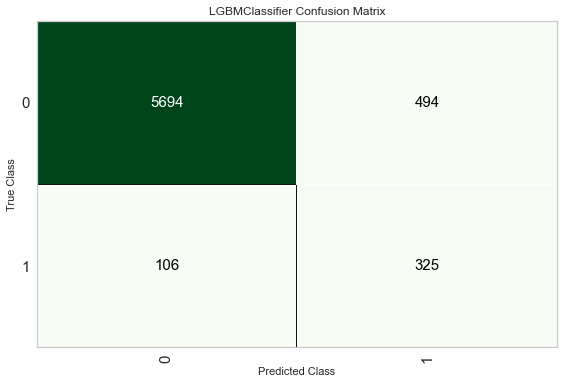

In [52]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

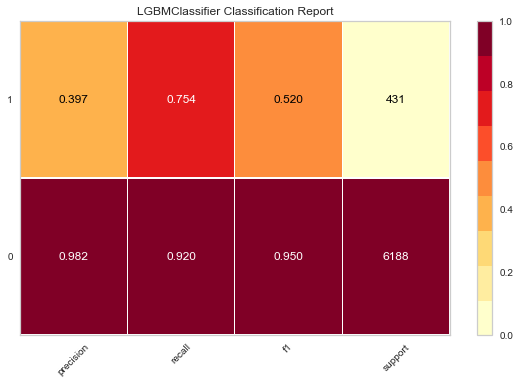

In [60]:
plot_model(tuned_lgbm, plot = 'class_report')

### **Blending**

In [53]:
catboost = create_model("catboost")
xgb = create_model("xgboost")
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9372,0.9515,0.4752,0.5217,0.4974,0.4640,0.4646
1,0.9417,0.9428,0.4300,0.5658,0.4886,0.4583,0.4632
2,0.9417,0.9517,0.5100,0.5543,0.5313,0.5002,0.5007
3,0.9352,0.9268,0.4200,0.5000,0.4565,0.4224,0.4242
4,0.9372,0.9246,0.4000,0.5195,0.4520,0.4193,0.4233
5,0.9320,0.9311,0.3800,0.4691,0.4199,0.3842,0.3866
6,0.9385,0.9412,0.4950,0.5319,0.5128,0.4800,0.4804
7,0.9449,0.9480,0.4950,0.5952,0.5405,0.5115,0.5140
8,0.9372,0.9297,0.3564,0.5294,0.4260,0.3941,0.4028
9,0.9352,0.9339,0.4059,0.5062,0.4505,0.4166,0.4194


In [54]:
# blend individual models
blend_soft = blend_models(estimator_list = [tuned_lgbm, xgb, rf, catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9424,0.9562,0.5545,0.5600,0.5572,0.5264,0.5264
1,0.9449,0.9481,0.5000,0.5882,0.5405,0.5115,0.5134
2,0.9372,0.9549,0.5900,0.5130,0.5488,0.5153,0.5167
3,0.9365,0.9340,0.4900,0.5104,0.5000,0.4661,0.4662
4,0.9398,0.9385,0.4800,0.5393,0.5079,0.4760,0.4769
5,0.9359,0.9442,0.4500,0.5056,0.4762,0.4422,0.4430
6,0.9391,0.9519,0.5149,0.5361,0.5253,0.4927,0.4929
7,0.9437,0.9512,0.5248,0.5761,0.5492,0.5192,0.5199
8,0.9333,0.9378,0.4257,0.4886,0.4550,0.4197,0.4208
9,0.9398,0.9431,0.5149,0.5417,0.5279,0.4958,0.4960


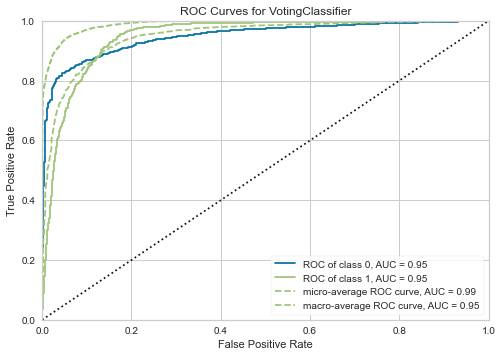

In [57]:
plot_model(blend_soft, plot = 'auc')

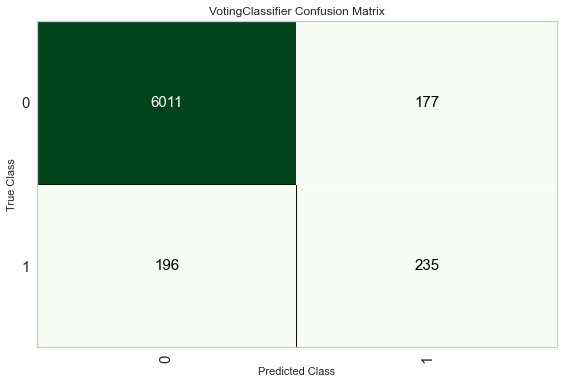

In [58]:
plot_model(blend_soft, plot = 'confusion_matrix')

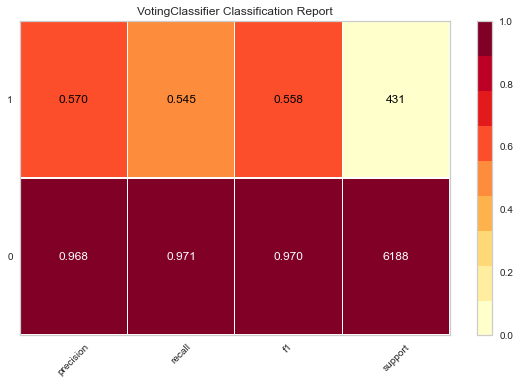

In [59]:
plot_model(blend_soft, plot = 'class_report')

In [55]:
# blend individual models
blend_hard = blend_models(estimator_list = [tuned_lgbm, xgb, rf, catboost], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9405,0.0000,0.4653,0.5529,0.5054,0.4739,0.4759
1,0.9462,0.0000,0.4400,0.6197,0.5146,0.4870,0.4950
2,0.9424,0.0000,0.4900,0.5632,0.5241,0.4935,0.4949
3,0.9365,0.0000,0.4000,0.5128,0.4494,0.4163,0.4199
4,0.9385,0.0000,0.3900,0.5342,0.4509,0.4191,0.4249
5,0.9372,0.0000,0.4200,0.5185,0.4641,0.4311,0.4338
6,0.9391,0.0000,0.4554,0.5412,0.4946,0.4625,0.4644
7,0.9475,0.0000,0.5149,0.6190,0.5622,0.5345,0.5371
8,0.9359,0.0000,0.3663,0.5139,0.4277,0.3948,0.4011
9,0.9411,0.0000,0.4455,0.5625,0.4972,0.4664,0.4700


### **Stacking**

In [56]:
stack_soft = stack_models(estimator_list = [xgb, rf, catboost], meta_model = lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9392,0.9433,0.1287,0.6842,0.2167,0.2001,0.2794
1,0.9378,0.9215,0.1100,0.6111,0.1864,0.1700,0.2411
2,0.9404,0.9332,0.1300,0.7222,0.2203,0.2046,0.2901
3,0.9352,0.9051,0.0400,0.5000,0.0741,0.0651,0.1276
4,0.9411,0.9215,0.1100,0.8462,0.1947,0.1825,0.2926
5,0.9339,0.9160,0.1300,0.4643,0.2031,0.1799,0.2206
6,0.9339,0.9192,0.0792,0.4706,0.1356,0.1190,0.1729
7,0.9365,0.9321,0.1089,0.5789,0.1833,0.1661,0.2318
8,0.9339,0.9097,0.0792,0.4706,0.1356,0.1190,0.1729
9,0.9339,0.9229,0.0396,0.4444,0.0727,0.0627,0.1174


In [68]:
best_auc_model = automl(optimize = 'AUC')

In [69]:
best_auc_model

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(bagging_fraction=0.4,
                                             bagging_freq=3,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.6,
                                             importance_type='split',
                                             learning_rate=0.01, max_depth=-1,
                                             min_child_samples=86,
                                             min_child_weight=0.001,
                                             min_split_gain=0.1,
                                             n_estimators=180, n_jobs=-1,
                                             num_leaves=40, objective=None,
                                             ra...
              

In [65]:
pred_holdouts = predict_model(best_auc_model)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9436,0.9482,0.5452,0.5704,0.5575,0.5275,0.5276


,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,y,Label,Score
0,-1.112050,-0.875518,-1.011569,-1.239898,-1.323520,-1.497505,-1.317686,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,no,no,0.9570
1,-0.668094,0.241276,-1.011569,-0.323951,1.035683,0.830101,1.018314,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,no,no,0.9684
2,-1.427041,0.123849,0.332970,0.560522,-0.473964,0.816149,1.018314,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9735
3,-0.812122,1.490943,-1.011569,1.687064,-0.260244,0.625627,1.018314,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,no,no,0.9218
4,0.880467,-0.030028,-1.011569,-0.323951,1.035683,0.822121,1.018314,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9749


In [67]:
final_rf = finalize_model(best_auc_model)

In [71]:
final_rf

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(bagging_fraction=0.4,
                                             bagging_freq=3,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.6,
                                             importance_type='split',
                                             learning_rate=0.01, max_depth=-1,
                                             min_child_samples=86,
                                             min_child_weight=0.001,
                                             min_split_gain=0.1,
                                             n_estimators=180, n_jobs=-1,
                                             num_leaves=40, objective=None,
                                             ra...
              

In [72]:
#save model
save_model(final_rf,'Final Model 06May2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'housing', 'loan',
                                                             'contact', 'month',
                                                             'day_of_week',
                                                             'poutcome'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'duration',
                                                           'campaign',
                                                           'emp.var.rate',
                                                           '